In [2]:
import itertools
import random
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import os
import logging
import threading
import time

In [60]:
YEARS = [str(y) for y in range(1990,2019)]
df_path = 'myDATA/01- france_collaboration_df.csv'
all_jsons = [('Data/COMP/' + 'COMP-'+year+'.json') for year in YEARS] 

In [71]:
# retrieve some infos about the data
all_auth = set()

n_aut_by_y = []
n_newAut_by_y = []

totPub = 0
n_pub_by_y = []
n_newPub_by_y = []

totColl = 0
n_collab_by_y = []
n_newCollab_by_y = []

for i in range(len(YEARS)):
    year = YEARS[i]
    file_path = all_jsons[i]
    print("\n...", year, "...")
    f = open(file_path)
    json_file = json.load(f)['search-results']['entry']
    
    print("  #publications", len(json_file))
    n_newPub_by_y.append(len(json_file))
    
    totPub += len(json_file)
    n_pub_by_y.append(totPub)

    
    seen = {}
    new_aut = 0
    # iterate over publications
    for pub in json_file: 
        if "author-count" in pub:
            if(pub["author-count"]["#text"] != "0"):
                for aut in pub['author']:

                    if(pub["author-count"]["#text"] == "1"):
                        curr_aut = pub['author']["authid"]
                    else:
                        curr_aut = aut['authid']

                    if(curr_aut not in seen):
                        seen[curr_aut] = set()
                    if(curr_aut not in all_auth):
                        new_aut += 1

                    all_auth.add(curr_aut)

                    for other_aut in pub['author']:

                        if(pub["author-count"]["#text"] == "1"):
                            curr_collab = pub['author']["authid"]
                        else:
                            curr_collab = other_aut['authid']

                        if(curr_aut != curr_collab):
                            seen[curr_aut].add(curr_collab)
    print("  #authors ", len(seen))
    print("  #newAuthors ", new_aut)
    
    curr_n_coll = 0
    for aut in seen:
        curr_n_coll += len(seen[aut])
    
    totColl += curr_n_coll
    n_collab_by_y.append(totColl)
    n_newCollab_by_y.append(curr_n_coll)
    
    n_aut_by_y.append(len(all_auth))
    n_newAut_by_y.append(new_aut)
    
print("\n TOTAL #Authors", len(all_auth))


... 1990 ...
  #publications 851
  #authors  1742
  #newAuthors  1742

... 1991 ...
  #publications 1022
  #authors  1911
  #newAuthors  1572

... 1992 ...
  #publications 1329
  #authors  2465
  #newAuthors  1828

... 1993 ...
  #publications 1664
  #authors  3299
  #newAuthors  2422

... 1994 ...
  #publications 2037
  #authors  3943
  #newAuthors  2543

... 1995 ...
  #publications 2363
  #authors  4838
  #newAuthors  3052

... 1996 ...
  #publications 3155
  #authors  6171
  #newAuthors  3802

... 1997 ...
  #publications 3447
  #authors  7184
  #newAuthors  4203

... 1998 ...
  #publications 3887
  #authors  8476
  #newAuthors  4865

... 1999 ...
  #publications 3574
  #authors  7853
  #newAuthors  4135

... 2000 ...
  #publications 4237
  #authors  9547
  #newAuthors  5100

... 2001 ...
  #publications 4372
  #authors  10041
  #newAuthors  5147

... 2002 ...
  #publications 5263
  #authors  12680
  #newAuthors  6702

... 2003 ...
  #publications 6028
  #authors  13490
  #newAuth

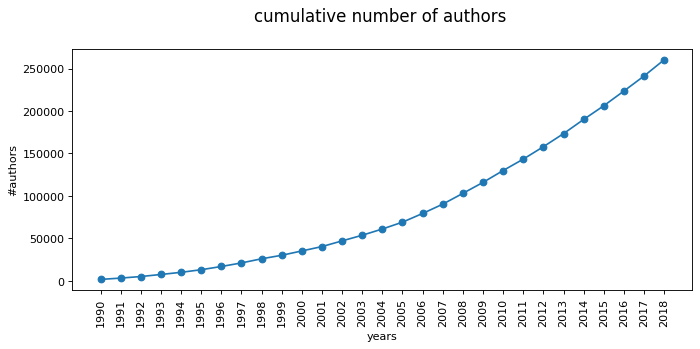

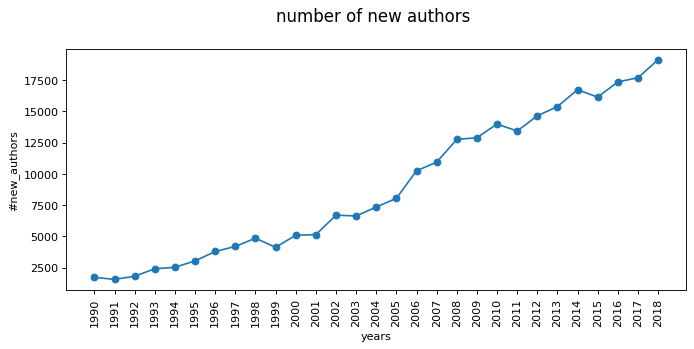

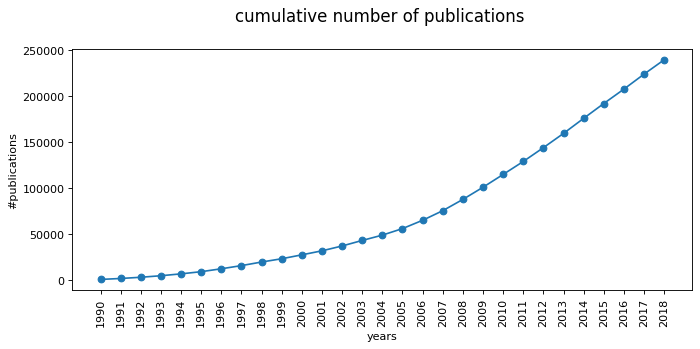

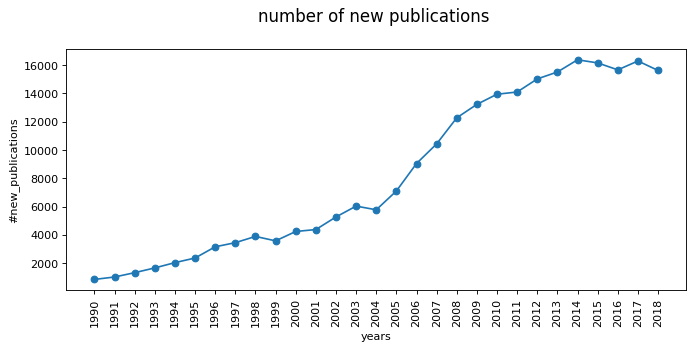

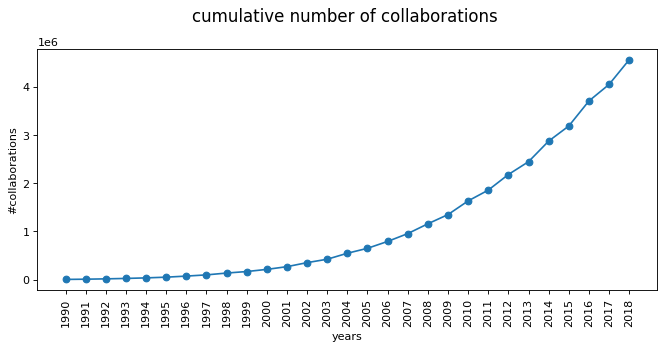

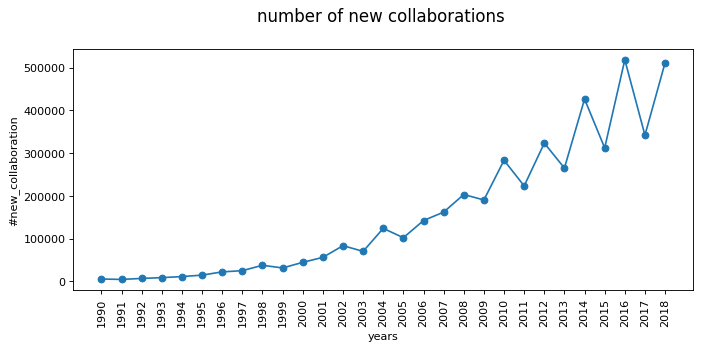

In [72]:
## Plot infos about data

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#authors")
plt.title("cumulative number of authors \n", fontdict = {'fontsize' : 15})    
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_aut_by_y)
plt.scatter(YEARS, n_aut_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_authors")
plt.title("number of new authors \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newAut_by_y)
plt.scatter(YEARS, n_newAut_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#publications")
plt.title("cumulative number of publications \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_pub_by_y)
plt.scatter(YEARS, n_pub_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_publications")
plt.title("number of new publications \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newPub_by_y)
plt.scatter(YEARS, n_newPub_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#collaborations")
plt.title("cumulative number of collaborations \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_collab_by_y)
plt.scatter(YEARS, n_collab_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_collaboration")
plt.title("number of new collaborations \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newCollab_by_y)
plt.scatter(YEARS, n_newCollab_by_y)

In [80]:
# Build the ID column of the dataset
df = pd.DataFrame(columns=np.concatenate((["ID"], YEARS), axis=None))
df["ID"] = list(all_auth)
df.to_csv(df_path, index=False)
df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,37081357700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57190400501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7403575683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7004186880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23472585900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260318,55925861600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260319,57196019981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260320,56346260600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260321,7202258995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# build the non_cumulative collaboration dataset
df=pd.read_csv(df_path)

# all_auth = set()
for i in range(len(YEARS)):
    print('\n', YEARS[i])
    year = YEARS[i]
    file_path = all_jsons[i]
    
    f = open(file_path)
    json_file = json.load(f)['search-results']['entry']
    
    seen = {}
    c = 0
    
    
    # iterate over publications
    for pub in json_file: 
        if "author-count" in pub:
            if(pub["author-count"]["#text"] != "0"):
                
                if(c%150==0 or c==len(json_file)):
                    print('  -> iterating over publications', c, '/', len(json_file), end='\r')

                for aut in pub['author']:
                    if(pub["author-count"]["#text"] == "1"):
                        curr_aut = pub['author']["authid"]
                    else:
                        curr_aut = aut['authid']
                        
                    if(curr_aut not in seen):
                        seen[curr_aut] = set()
                        
                    for other_aut in pub['author']:
                        if(pub["author-count"]["#text"] == "1"):
                            curr_collab = pub['author']["authid"]
                        else:
                            curr_collab = other_aut['authid']
                        if(curr_aut != curr_collab):
                            seen[curr_aut].add(curr_collab)
        c += 1

    c = 0
    
    print()
    for aut in seen:
        
        if(c%150==0 or c==len(seen)-1):
            print('  -> adding authors to df', c, '/', len(seen), end='\r')
        
        num_collabs = len(seen[aut])
        #if(aut not in all_auth):
        #    df = df.append({'ID':aut, year:num_collabs}, ignore_index=True)
        #    all_auth.add(aut)
        #else:
        df[year][df.ID == int(aut)] = num_collabs
        c += 1
        
    df.to_csv(df_path, index=False)


 1990
  -> iterating over publications 750 / 851
  -> adding authors to df 1741 / 1742
 1991
  -> iterating over publications 900 / 1022
  -> adding authors to df 1910 / 1911
 1992
  -> iterating over publications 1200 / 1329
  -> adding authors to df 2464 / 2465
 1993
  -> iterating over publications 1650 / 1664
  -> adding authors to df 3298 / 3299
 1994
  -> iterating over publications 1950 / 2037
  -> adding authors to df 3942 / 3943
 1995
  -> iterating over publications 2250 / 2363
  -> adding authors to df 4837 / 4838
 1996
  -> iterating over publications 3150 / 3155
  -> adding authors to df 6170 / 6171
 1997
  -> iterating over publications 3300 / 3447
  -> adding authors to df 7183 / 7184
 1998
  -> iterating over publications 3750 / 3887
  -> adding authors to df 8475 / 8476
 1999
  -> iterating over publications 3450 / 3574
  -> adding authors to df 7852 / 7853
 2000
  -> iterating over publications 4200 / 4237
  -> adding authors to df 9546 / 9547
 2001
  -> iterating ov

In [82]:
# build a cumulative collaboration dataset
df=pd.read_csv(df_path)
df = df.fillna(0)
df[YEARS] = df[YEARS].applymap(np.int64)

for year in YEARS[1:]:
    df[year] = df[str(int(year)-1)] + df[year] 

df.to_csv(df_path, index=False)
df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,37081357700,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2
1,57190400501,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,3
2,7403575683,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
3,7004186880,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,8
4,23472585900,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260318,55925861600,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
260319,57196019981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
260320,56346260600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
260321,7202258995,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [83]:
df=pd.read_csv(df_path)

df1=pd.read_csv("myDATA/00-collaboration_df.csv")
df1

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,8958327900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6508297663,0,0,0,0,0,0,0,0,0,...,4,7,7,8,8,8,8,8,8,8
2,7004267341,0,0,0,0,0,0,0,0,0,...,10,10,10,16,16,16,16,16,16,16
3,8642393600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,7,7,7
4,55873955900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232833,6507630481,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,29,29,29,29,29
232834,24577815500,0,0,0,0,0,0,0,0,0,...,4,4,4,4,6,13,16,16,16,70
232835,57195243976,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,8,8
232836,35328962100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,3


In [85]:
a = list(df["ID"])
b = list(df1["ID"])

len(list(set(a).intersection(b)))

232838